In [1]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
import numpy as np
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalanceCascade, EasyEnsemble
from sklearn.ensemble import AdaBoostClassifier
import warnings
from itable import PrettyTable, TableStyle, CellStyle
import pandas as pd
warnings.filterwarnings("ignore")
%pylab inline
pylab.rcParams["figure.figsize"] = (12, 6)
plt.style.use("fivethirtyeight")

Populating the interactive namespace from numpy and matplotlib


In [20]:
# this is how he generated the dataset 
# however, migrating to python3 created differences in the actual output values

# X, y = make_classification(
#     class_sep=1.2, weights=[0.1, 0.9], n_informative=3,
#     n_redundant=1, n_features=5, n_clusters_per_class=1,
#     n_samples=10000, flip_y=0, random_state=10
# )

# you need to use this to get actual values from his video

from numpy import genfromtxt
X = genfromtxt("X_0.17b1.csv", delimiter=',')
y = genfromtxt("y_0.17b1.csv", delimiter=',')
y = np.array([int(yy) for yy in y])

In [7]:
# 0.16.0
# 0.16.1
# 0.16b1
# 0.17.1
# 0.17
# 0.17b1

In [21]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

y = y.astype('str')
y[y=='1'] = 'L'
y[y=='0'] = 'S'

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=0
)

X_1, X_2 = X_train[y_train=='S'], X_train[y_train=='L']

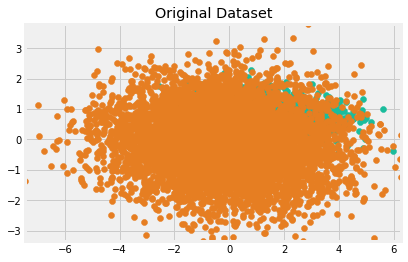

In [22]:
plt.scatter(list(zip(*X_1))[0], list(zip(*X_1))[1], color = '#1abc9c')
plt.scatter(list(zip(*X_2))[0], list(zip(*X_2))[1], color = '#e67e22')

x_coords = list(zip(*X_1))[0]+ list(zip(*X_2))[0]
y_coords = list(zip(*X_1))[1]+ list(zip(*X_2))[1]
plt.axis([min(x_coords), max(x_coords), min(y_coords), max(y_coords)])

plt.title("Original Dataset")
plt.show()

In [76]:
clf_base = LogisticRegression()
grid = {'C': 10.0**np.arange(-2,3),
        'penalty': ['l1', 'l2']
       }

cv = KFold(n_splits=5, shuffle=True, random_state=0)
clf = GridSearchCV(clf_base, grid, cv=cv, n_jobs=8, scoring='f1_macro')

clf.fit(X_train, y_train)

coef = clf.best_estimator_.coef_
intercept = clf.best_estimator_.intercept_

x1 = np.linspace(-8, 10, 100)
x2 = -(coef[0][0] * x1 + intercept[0])/ coef[0][1]

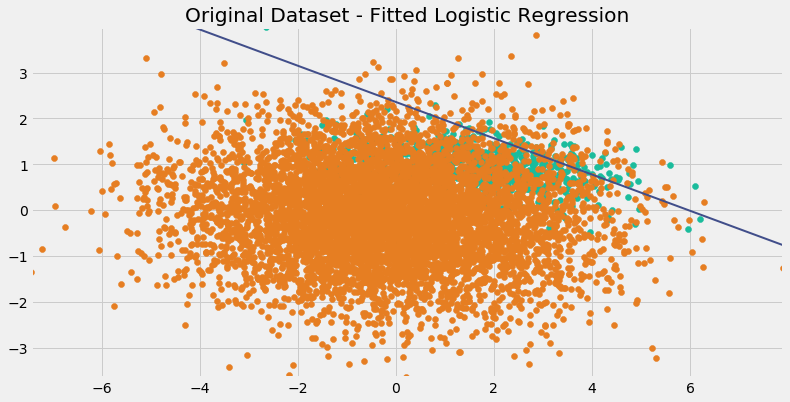

In [77]:
plt.scatter(list(zip(*X_1))[0], list(zip(*X_1))[1], color = '#1abc9c')
plt.scatter(list(zip(*X_2))[0], list(zip(*X_2))[1], color = '#e67e22')

x_coords = list(zip(*X_1))[0]+ list(zip(*X_2))[0]
y_coords = list(zip(*X_1))[1]+ list(zip(*X_2))[1]
plt.axis([min(x_coords), max(x_coords), min(y_coords), max(y_coords)])

plt.title("Original Dataset - Fitted Logistic Regression")
plt.plot(x1, x2, color="#414e8a", linewidth=2)
plt.show()

In [71]:
coef[0][0]

-0.31569122529964133

In [72]:
coef[0][1]

0.0